In [46]:
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
image_color = mpimg.imread("/content/Find_Truck_color.jpg")

In [48]:
height, width = image_color[:2]

# Convert to Grayscale

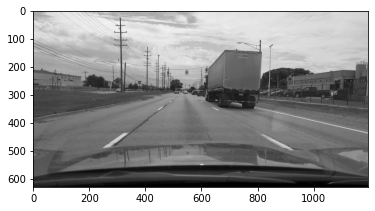

In [49]:
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap= 'gray')

# Create truck template

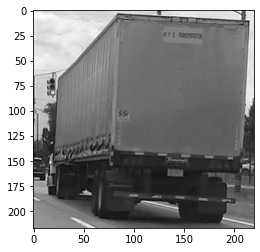

In [50]:
height, width = image_gray.shape[:2]

template_cropped = image_gray[138:355, 600:820]
plt.imshow(template_cropped, cmap='gray')

In [52]:
cv2.imwrite('Truck_template.jpg',template_cropped)

True

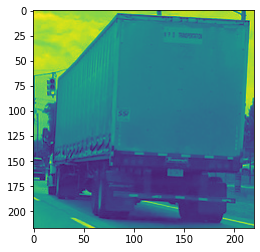

In [54]:
template = mpimg.imread('/content/Truck_template.jpg')
plt.imshow(template)

In [56]:
w, h = template.shape[::-1]
print(w, h)

220 217


# Template Matching

In [57]:
result = cv2.matchTemplate(image_gray, template, cv2.TM_CCOEFF_NORMED)
result.shape

(412, 975)

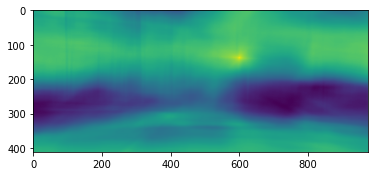

In [58]:
plt.imshow(result)

In [59]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

In [60]:
print("min val : "+str(min_val)+", max val : "+str(max_val)+", min loc : "+str(min_loc)+", max loc : "+str(max_loc))

min val : -0.5680132508277893, max val : 0.9997252821922302, min loc : (732, 280), max loc : (600, 138)


In [63]:
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(image_color, top_left, bottom_right, (255,0,0), 5)

array([[[170, 185, 204],
        [172, 187, 206],
        [175, 190, 209],
        ...,
        [209, 210, 214],
        [209, 210, 214],
        [209, 210, 212]],

       [[181, 196, 215],
        [181, 198, 216],
        [183, 200, 218],
        ...,
        [209, 210, 214],
        [210, 211, 215],
        [210, 211, 213]],

       [[182, 199, 219],
        [182, 199, 217],
        [183, 200, 218],
        ...,
        [210, 211, 215],
        [211, 212, 216],
        [211, 212, 214]],

       ...,

       [[ 26,  31,  34],
        [ 26,  31,  34],
        [ 26,  31,  34],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[ 25,  30,  33],
        [ 25,  30,  33],
        [ 25,  30,  33],
        ...,
        [  1,   1,   1],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 24,  29,  32],
        [ 24,  29,  32],
        [ 23,  28,  31],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

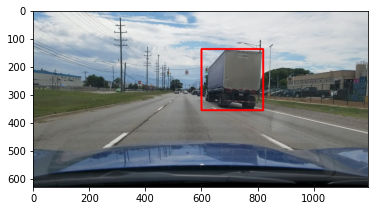

In [64]:
plt.imshow(image_color)